In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk
from sklearn import svm

In [26]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from IPython.display import display

In [27]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Moham\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier

In [28]:
data = pd.read_csv("emails.csv")

In [29]:
display(data.head())
display(data.describe())
print(data.info())

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB
None


0    4360
1    1368
Name: spam, dtype: int64
0    0.761173
1    0.238827
Name: spam, dtype: float64


c:\Users\Moham\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


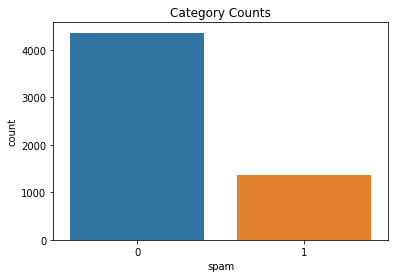

In [30]:
print(data['spam'].value_counts())
print(data['spam'].value_counts(normalize=True))

sns.countplot(data['spam'])
plt.title('Category Counts')
plt.show()

In [31]:
data['word_count'] = data['text'].str.split().str.len()

print(data.groupby('spam')['word_count'].mean())


spam
0    345.804817
1    266.432749
Name: word_count, dtype: float64


In [32]:
tokenized_messages = data['text'].str.lower().apply(word_tokenize)
print(tokenized_messages)

0       [subject, :, naturally, irresistible, your, co...
1       [subject, :, the, stock, trading, gunslinger, ...
2       [subject, :, unbelievable, new, homes, made, e...
3       [subject, :, 4, color, printing, special, requ...
4       [subject, :, do, not, have, money, ,, get, sof...
                              ...                        
5723    [subject, :, re, :, research, and, development...
5724    [subject, :, re, :, receipts, from, visit, jim...
5725    [subject, :, re, :, enron, case, study, update...
5726    [subject, :, re, :, interest, david, ,, please...
5727    [subject, :, news, :, aurora, 5, ., 2, update,...
Name: text, Length: 5728, dtype: object


In [33]:
def alpha(tokens):
    alpha = []
    for token in tokens:
        if str.isalpha(token) or token in ['n\'t','won\'t']:
            if token == 'n\'t':
                alpha.append('not')
                continue
            elif token == 'won\'t':
                alpha.append('wont')
                continue
            alpha.append(token)
    return alpha

tokenized_messages = tokenized_messages.apply(alpha)
print(tokenized_messages)

0       [subject, naturally, irresistible, your, corpo...
1       [subject, the, stock, trading, gunslinger, fan...
2       [subject, unbelievable, new, homes, made, easy...
3       [subject, color, printing, special, request, a...
4       [subject, do, not, have, money, get, software,...
                              ...                        
5723    [subject, re, research, and, development, char...
5724    [subject, re, receipts, from, visit, jim, than...
5725    [subject, re, enron, case, study, update, wow,...
5726    [subject, re, interest, david, please, call, s...
5727    [subject, news, aurora, update, aurora, versio...
Name: text, Length: 5728, dtype: object


In [34]:
def remove_stop_words(tokens):
    no_stop = []
    for token in tokens:
        if token not in stopwords.words('english'):
            no_stop.append(token)
    return no_stop
tokenized_messages = tokenized_messages.apply(remove_stop_words)
print(tokenized_messages)

0       [subject, naturally, irresistible, corporate, ...
1       [subject, stock, trading, gunslinger, fanny, m...
2       [subject, unbelievable, new, homes, made, easy...
3       [subject, color, printing, special, request, a...
4       [subject, money, get, software, cds, software,...
                              ...                        
5723    [subject, research, development, charges, gpg,...
5724    [subject, receipts, visit, jim, thanks, invita...
5725    [subject, enron, case, study, update, wow, day...
5726    [subject, interest, david, please, call, shirl...
5727    [subject, news, aurora, update, aurora, versio...
Name: text, Length: 5728, dtype: object


In [35]:
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized = []
    for token in tokens:
        lemmatized.append(lemmatizer.lemmatize(token))
    return " ".join(lemmatized)

tokenized_messages = tokenized_messages.apply(lemmatize)
print(tokenized_messages)

0       subject naturally irresistible corporate ident...
1       subject stock trading gunslinger fanny merrill...
2       subject unbelievable new home made easy im wan...
3       subject color printing special request additio...
4       subject money get software cd software compati...
                              ...                        
5723    subject research development charge gpg forwar...
5724    subject receipt visit jim thanks invitation vi...
5725    subject enron case study update wow day super ...
5726    subject interest david please call shirley cre...
5727    subject news aurora update aurora version fast...
Name: text, Length: 5728, dtype: object


In [36]:
data['text'] = tokenized_messages

display(data.head(10))

,text,spam,word_count
0,subject naturally irresistible corporate ident...,1,324
1,subject stock trading gunslinger fanny merrill...,1,89
2,subject unbelievable new home made easy im wan...,1,87
3,subject color printing special request additio...,1,98
4,subject money get software cd software compati...,1,52
5,subject great nnews hello welcome medzonline s...,1,84
6,subject hot play motion homeland security inve...,1,1703
7,subject save money buy getting thing tried cia...,1,95
8,subject undeliverable home based business grow...,1,121
9,subject save money buy getting thing tried cia...,1,95


In [39]:
x = data['text']
y = data['spam']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=34, stratify=y)

In [43]:
# Create the tf-idf vectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii')

# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(x_train)

# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(x_test)

In [46]:
for i in range(1,10,2):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(tfidf_train,y_train)
  predictedResult = model.predict(tfidf_test)
  print("Accuracy: ",model.score(tfidf_test,y_test))
  print("F1 score: ", metrics.f1_score(y_test,predictedResult))


Accuracy:  0.981675392670157
F1 score:  0.9613259668508287
Accuracy:  0.9781849912739965
F1 score:  0.9530956848030019
Accuracy:  0.9790575916230366
F1 score:  0.9550561797752808
Accuracy:  0.9790575916230366
F1 score:  0.9552238805970148
Accuracy:  0.9781849912739965
F1 score:  0.9536178107606679


In [48]:
c_range = np.logspace(-2,10,13)
gamma_range = np.logspace(-9,3,13)
degree_range =  np.logspace(-2,10,13)
kernel_range = np.array(['rbf','linear','poly'])
params = {'kernel': kernel_range, 'c': c_range, 'gamma': gamma_range, 'degree':degree_range}
param_grid = dict(gamma = gamma_range, C=c_range, degree=degree_range)
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 42)
svm_cv = GridSearchCV(svm.SVC(),param_grid = param_grid,cv=cv)
svm_cv.fit(tfidf_train, y_train)
# Predicting the Test set results
y_predict_test = svm_cv.predict(tfidf_test)
cm = confusion_matrix(y_test, y_predict_test)
print(svm_cv.best_estimator_)
#sns.heatmap(cm, annot=True)
#Evaluating Model
print(classification_report(y_test, y_predict_test))
print("test set")
print("\nAccuracy Score: " + str(metrics.accuracy_score(y_test, y_predict_test)))
print("F1 Score: " + str(metrics.f1_score(y_test, y_predict_test)))
print("Recall: " + str(metrics.recall_score(y_test, y_predict_test)))
print("Precision: " + str(metrics.precision_score(y_test, y_predict_test)))